<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part6/P6_Ch01_CH02_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL development pipeline

## Data Loader -> Model Definition -> Training Script
~~~
#Example from https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence

from skimage.io import imread
from skimage.transform import resize
import numpy as np
import math

# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class CIFAR10Sequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        low = idx * self.batch_size
        # Cap upper bound at array length; the last batch may be smaller
        # if the total number of items is not a multiple of batch size.
        high = min(low + self.batch_size, len(self.x))
        batch_x = self.x[low:high]
        batch_y = self.y[low:high]

        return np.array([
            resize(imread(file_name), (200, 200))
               for file_name in batch_x]), np.array(batch_y)


~~~
- __len__: Number of batch in the Sequence.
- __getitem__ : Gets batch at position index.
- on_epoch_end (optional): Method called at the end of every epoch.

In [ ]:
import math
import random

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

In [ ]:
class DataGenerator(keras.utils.Sequence):
    def __init__(
        self,
        batch_size,
        csv_path,
        fold,
        image_size,
        mode ='train',
        shuffle = True):

        self.batch_size = batch_size
        self.image_size = image_size
        self.fold = fold
        self.mode = mode
        self.shuffle = shuffle

        self.df = pd.read_csv(csv_path)

        if self.mode == 'train':
            self.df = self.df[self.df['fold'] != self.fold]
        elif self.mode =='val':
            self.df = self.df[self.df['fold'] == self.fold]

        self.on_epoch_end()


    def __len__(self):
        return math.ceil(len(self.df)/self.batch_size)

    def __getitem__(self, idx):
        strt = idx * self.batch_size
        fin = (idx + 1)* self.batch_size
        data = self.df.iloc[strt:fin]

        batch_x, batch_y = self.get_data(data)

        return np.array(batch_x), np.array(batch_y)

    def get_data(self, data):
        batch_x =[]
        batch_y =[]

        for _, r in data.iterrows():
            file_name = r['filename']

            image = cv2.imread(f'./data/images/{file_name}.jpg')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # input image resize (배치로 묶기위해)
            image = cv2.resize(image, (self.image_size, self.image_size))

            # rescaling
            image = image /255.

            # 고양이 1 강아지 2 -> 고양이 0 강아지 1
            label = int(r['species']) -1

            batch_x.append(image)
            batch_y.append(label)
        return batch_x, batch_y



    def on_epoch_end(self): # callback function
        if self.shuffle:
            self.df = self.df.sample(frac =1).reset_index(drop=True)


In [ ]:
csv_path = './data/kfolds.csv'
train_generator = DataGenerator(
    batch_size =9,
    csv_path =csv_path,
    fold = 1,
    image_size = 256,
    mode ='train',
    shuffle = True
)

In [ ]:
print(len(train_generator))

654


In [ ]:
 654 * 9

5886

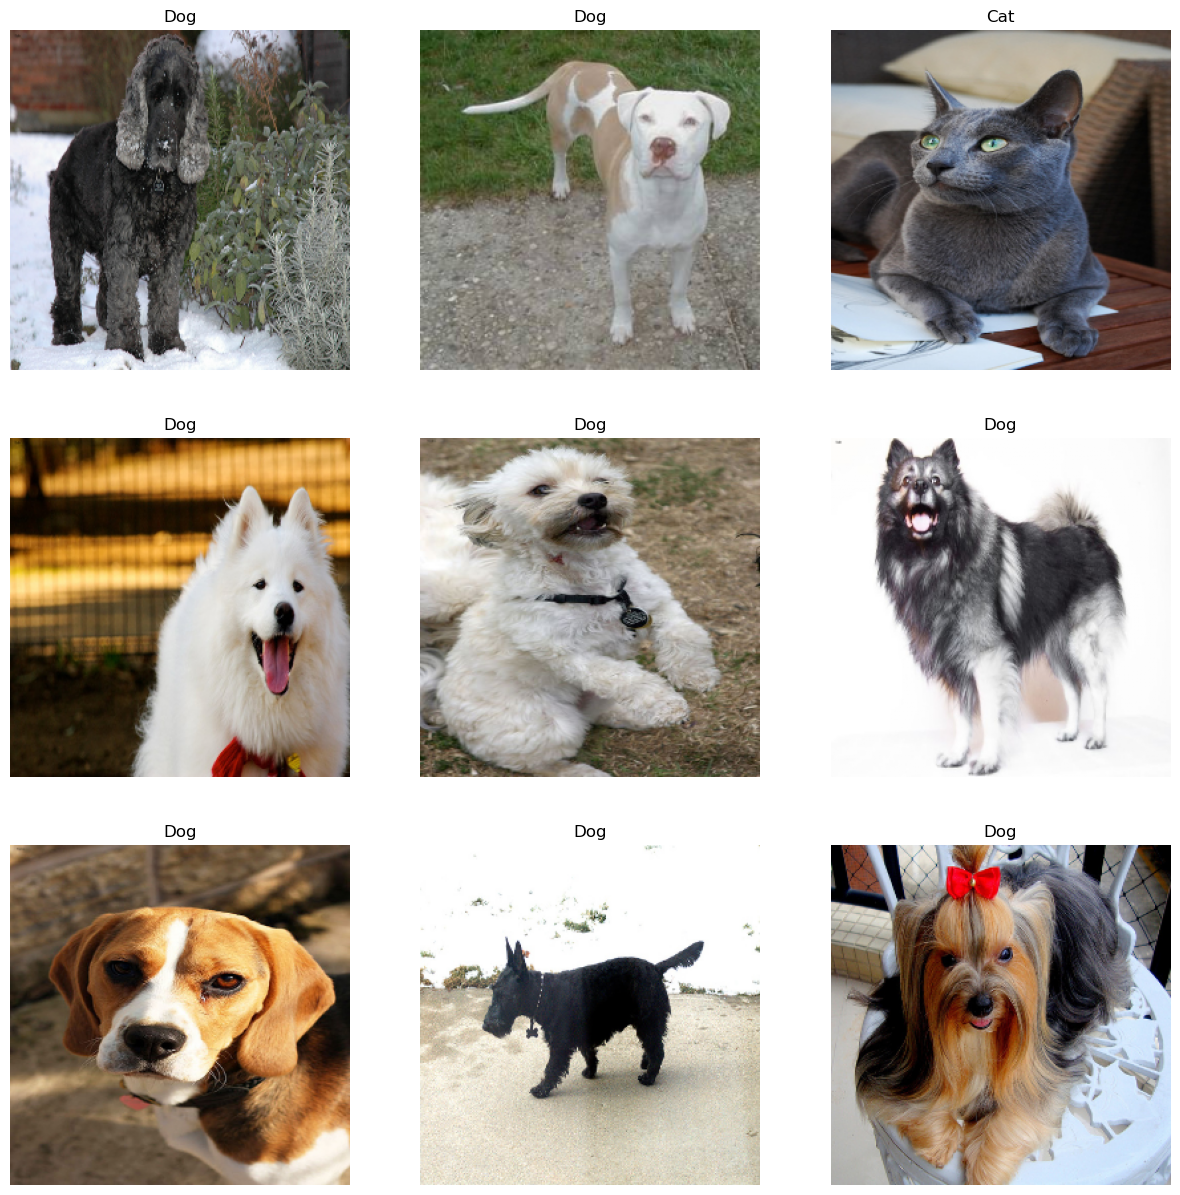

In [ ]:
class_name =['Cat', 'Dog']
for batch in train_generator:
    X, y = batch
    plt.figure(figsize = (15,15))

    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
    break